# Python timings

Goal:

* Evaluate the performance of Cython and Numba compared to standard python

First run the test

In [1]:
!pytest test.py -v

============================= test session starts ==============================
platform linux -- Python 3.7.3, pytest-5.0.1, py-1.8.0, pluggy-0.12.0 -- /home/ovewh/anaconda3/bin/python
cachedir: .pytest_cache
rootdir: /home/ovewh/Documents/FYS4150/Computilus/Project2/src/python
plugins: openfiles-0.3.2, arraydiff-0.3, doctestplus-0.3.0, remotedata-0.3.1
collected 6 items                                                              

test.py::test_MaxElemOffDiag[prog0] PASSED                               [ 16%]
test.py::test_MaxElemOffDiag[prog1] PASSED                               [ 33%]
test.py::test_MaxElemOffDiag[prog2] PASSED                               [ 50%]
test.py::test_Eigenvalues[prog0-200] PASSED                              [ 66%]
test.py::test_Eigenvalues[prog1-200] PASSED                              [ 83%]
test.py::test_Eigenvalues[prog2-20] PASSED                               [100%]

=========================== 6 passed in 6.55 seconds ===========================

In [2]:
import numbaJacobi
import cythonJacobi

print(cythonJacobi.timeJacobi(200,10))
print(numbaJacobi.timeJacobi(200, 10))

(2.5087404597958085, 0.014017215243338566)
(3.045377575096791, 0.10361116559760723)


In [6]:
import pythonJacobi
import numbaJacobi
# pythonJacobi.timeJacobi(25,10)

N = 10
h = 1./(N)
d = 2./(h**2)
a = -1./(h**2)

print(pythonJacobi.run(N, a, d)[0])
print(numbaJacobi.run(N, a, d)[0])

144
144


* To evaluate the performance of we will use the profiling tools included in the jupyter suite


In [20]:
import pythonJacobi
import numbaJacobi
import cythonJacobi
import numpy as np
import time
import matplotlib.pyplot as plt
#Defining the size of our test matrices
nDims = [5,10, 20 ,50, 100 ,200]

In [7]:


def run(prog, A, N,timings=None ,runs = 10):
    A_c = A.copy()
    if runs == 10:
        timings = timings
        runs = runs -1
        run(prog,A_c,N, timings, runs=runs)
    elif (runs > 0):
        runs = runs -1
        run(prog,A_c,N, timings, runs=runs)
        
#     iterations = 0
    A_c = A.copy()
    t0 = time.time()
    offDiagMax = prog.maxElemOffDiag(A,N)[0]
    while(offDiagMax > 10e-9):
#         iterations += 1
        offDiagMax, row, col = prog.maxElemOffDiag(A, N)
        A = prog.jacobiRotate(A,row, col, N)

    t1 = time.time()
    t = t1-t0
    timings.append(t)
    
    
    

In [21]:
cythonavgTime = []
testMarices = []

for nDim in nDims:
    h = 1./(nDim)
    d = 2./(h**2)
    a = -1./(h**2)
    testMarices.append(cythonJacobi.create_toeplitz(d, a, nDim))
for i in range(len(nDims)):
    timings = []
    run(cythonJacobi, testMarices[i], nDims[i], timings)
    cythonavgTime.append(np.mean(timings))
    
cythonavgTime

[7.288455963134765e-05,
 0.0004121065139770508,
 0.003709101676940918,
 0.036400675773620605,
 0.37728879451751707,
 4.318577551841736]

In [24]:
testMarices = []
numbaAvgTime = []

for nDim in nDims:
    h = 1./(nDim)
    d = 2./(h**2)
    a = -1./(h**2)
    testMarices.append(numbaJacobi.create_toeplitz(d, a, nDim))

for i in range(len(nDims)):
    timings = []
    run(numbaJacobi, testMarices[i], nDims[i], timings)
    numbaAvgTime.append(np.mean(timings))
numbaAvgTime

[0.0001523733139038086,
 0.000995945930480957,
 0.005467128753662109,
 0.018185853958129883,
 0.2322016477584839,
 3.3823241710662844]

In [16]:
testMarices = []
pythonAvgTime = []

for nDim in nDims:
    h = 1./(nDim)
    d = 2./(h**2)
    a = -1./(h**2)
    testMarices.append(pythonJacobi.create_toeplitz(d, a, nDim))

for i in range(len(nDims[0:3])):
    timings = []
    run(pythonJacobi, testMarices[i], nDims[i], timings)
    pythonAvgTime.append(np.mean(timings))    


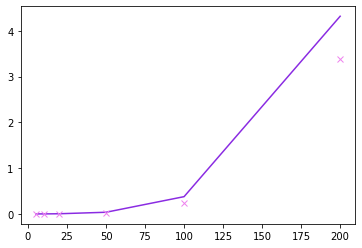

In [28]:
plt.plot(nDims,cythonavgTime, '-', color = 'blueviolet')
plt.plot(nDims,numbaAvgTime, 'x', color = 'violet')